# Problem 1: Decision Tree Grid Search


## Directions

The main purpose of this problem is for you to gain experience creating and visualizing a Decision Tree along with sweeping a problem's parameter space - in this case by performing a grid search.  Doing so allows you to identify the optimal hyperparameter values to be used for training your model.

## Preliminaries

Let's import some common packages:

In [66]:
import numpy as np
from sklearn import datasets

## Load and Split Iris Data Set

Complete the following:

1. Load the `Iris` data set by calling the [load_iris()](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html) function of the `datasets` library from `sklearn` - name the dictionary that is returned `iris`. 

2. Call [train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) with a `test_size` of 40% and a `random_state` of `0`.  Save the output into `X_train`, `X_test`, `y_train`, and `y_test`, respectively. (Be sure to import the `train_test_split()` function first.)

In [67]:
#loading iris dataset from the dataset library
iris = datasets.load_iris()

In [68]:
#saving features and target in variables
X = iris.data  
y = iris.target

In [69]:
#splitting data into train and validation data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)

## Create a Single Decision Tree

Complete the following:

(Cell 1:)
1. Import the `DecisionTreeClassifier` class from the `sklearn.tree` library
2. Create a DecisionTreeClassifier object called `tree_clf` with a `random_state` of `42`
3. Fit the DecisionTreeClassifier object on the training data.

(Cell 2:)

4. Make a prediction on the test data, and name the predicted values output by the model `preds`.
5. Compute the performance of the model by measuring the accuracy score on the test set.  You must import the [accuracy_score()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) function from the `sklearn.metrics` library.  Name the accuracy score value you compute `acc_score`. 
6. Print the accuracy score to the screen.


In [70]:
#Defining decision tree classifier model and fitting with the training data

from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [71]:
#prediction and accuracy_score

preds = tree_clf.predict(X_test)
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_test, preds)

print('Accuracy=%s' % (acc_score))

Accuracy=0.95


## Perform Grid Search

Complete the following:

(Cell 1:)
1. Import the `GridSearchCV` class from the `sklearn.model_selection` library.
2. Create a dictionary called `param_grid` with three key-value pairs.  The keys are `max_depth`, `max_leaf_nodes` and `min_samples_split`, and their respective values are `[1,2,3,4,5,8,16,32]`, `list(range(2, 20, 1))` and `[2,3,4,5,8,12,16,20]`.
3. Instantiate an object of the `GridSearchCV` class called `grid_search_cv`.  Pass the following as input to the constructor: 
    - The model to be used. Use a `DecisionTreeClassifier` with a `random_state` parameter of `42`.
    - The paramter grid. 
    - The hyperparameter `verbose=1`. (Look this up.)
    - The number of cross-folds. Specify `cv=3`.
    
    
4. Call the `fit()` method to perform the grid search using 3-fold cross-validation.
5. Print the best parameters identified by the grid search using the `best_params_` attribute of the GridSearchCV object.

(Cell 2:)

6. Compute the predicted values `y_pred` using the test set `X_test`.
7. Calculate the accuracy, precision, and recall scores using the `accuracy_score()`, `precision_score()`, and `recall_score()` functions.  Call these `acc_score`, `prec_score`, and `recall_score`, respectively. Set the average parameter to `micro` when calculating precision and recall to account for multiple classes.
8. Print all three scores to the screen.

In [72]:
#create a model with GridSearchCV
#fitting model
#finding best hyper parameters

from sklearn.model_selection import GridSearchCV
param_grid = {
    "max_depth": [1,2,3,4,5,8,16,32],
    "max_leaf_nodes": list(range(2,20,1)),
    "min_samples_split":[2,3,4,5,8,12,16,20]
}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, verbose=1, cv=3)
grid_search_cv.fit(X_train, y_train)

print("The best parameters are: ", grid_search_cv.best_params_)

Fitting 3 folds for each of 1152 candidates, totalling 3456 fits
The best parameters are:  {'max_depth': 2, 'max_leaf_nodes': 3, 'min_samples_split': 2}


In [73]:
#prediction
#finding accuracy,precision & recall score

y_pred = grid_search_cv.predict(X_test)
from sklearn.metrics import accuracy_score, precision_score, recall_score

acc_score=accuracy_score(y_test, y_pred)
prec_score = precision_score(y_test, y_pred, average= 'micro')
recall_score = recall_score(y_test, y_pred, average= 'micro')

print('Accuracy=%s' % (acc_score))
print('Precision=%s' % (prec_score))
print('Recall=%s' % (recall_score))

Accuracy=0.8666666666666667
Precision=0.8666666666666667
Recall=0.8666666666666667


## Visualize Optimal Decision Tree as Text

Instantiate a new `DecisionTreeClassifier` object, and use the `best_params_` attribute of the `grid_search_cv` object to specify the best `max_depth`, `max_leaf_nodes` and `min_samples_split` values calculated from the grid search along with a `random_state` of `42`.  Retrain the "optimal" (for the few parameters that we swept) decision tree.

Next, use the [tree.export_text()](https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_text.html) method to visualize the "optimal" decision tree.  This function takes a trained classifier as its first parameter, and a set of feature names as its second parameter (the feature names are included in the `iris` dictionary returned from the `load_iris()` function).  The result is a text based visualization of the decision tree.  Note that this method returns a string, so you'll want to `print()` the result to get it to look right.

In [74]:
#Train an optimal model with the best hyperparameters

optimal_decision_tree_model = DecisionTreeClassifier(max_depth = 2, max_leaf_nodes= 3, min_samples_split = 2, random_state =42)
optimal_decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, max_leaf_nodes=3, random_state=42)

In [76]:
#textual visualization of the optimal decision tree

from sklearn.tree import export_text
print(export_text(optimal_decision_tree_model, feature_names = ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)'] ))

|--- petal length (cm) <= 2.35
|   |--- class: 0
|--- petal length (cm) >  2.35
|   |--- petal length (cm) <= 5.05
|   |   |--- class: 1
|   |--- petal length (cm) >  5.05
|   |   |--- class: 2



## Visualize Optimal Decision Tree as Image

Use the `tree.plot_tree()` method to visualize the "optimal" decision tree, which takes a trained classifier as its only parameter and returns a graphical visualization of the decision tree. Use `filled=True` as an argument to the method to add color to the image.

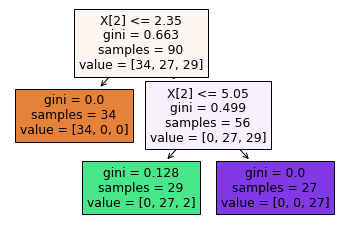

In [77]:
# Visualization of optimal Decision Tree as a plot/image

from sklearn.tree import plot_tree
plot_tree(optimal_decision_tree_model, filled=True);

## Critical Analysis

In your own words, describe or interpret the role of the gini score criterion in the decision tree algorithm. How does this compare to the entropy impurity measure? Finally, sklearn uses the CART (Classification and Regression Tree) algorithm to train Decision Trees. How does this algorithm determine the feature and threshold value to use for splitting at each step of the Decision Tree algorithm? It may be helpful to look at outside resources to help you answer these questions (The YouTube channel ["StatQuest"](https://youtu.be/7VeUPuFGJHk) has some excellent videos on Decision Trees for those of you that like visual explanations.) 

Make sure that you answer all the questions above. I am looking for **meaningful content** here that **goes into detail**. Don't just copy from the textbook or rush through answering this question.

### Ans:
To understand the gini score criterion, we first need to understand how decision trees work. Long story short, what a decision tree does is that it identifies features that contain the most significant information about the target and then it does the splitting. The splitting is done in such a way that the target feature values at each node achieve more purity. The best feature is the one that reduces the impurity of a node more. The splitting is stopped at the node where there is zero impurity and it is named a 'leaf'. 

#### Gini Index/score Vs Entropy 

They are two parameters by which the impurity of a split in a decision tree is calculated. With the calculated values they can determine the best split for a node. First, take a look at the equation for both. 
Gini score can be calculated using the first equation. Gini Score may range from (0 to 1).  0 value denotes the best split. The algorithm decides which node to split by calculating Gini Values. If the Gini score is lower in a particular split than other nodes in consideration then that particular node is given priority in process of splitting. If the Gini score is 0 then it means a perfect split has occurred and it becomes a leaf node where no more split is made. 

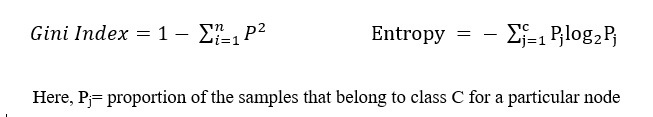

#### Why gini Impurity/score is preferred over Entropy?

Many state of the art algorithms use the Gini index as a default parameter. You may ask, why? This is because the calculation of the Gini index is faster and efficient for an algorithm compared to entropy impurity. As you can see from the equations given above that entropy has a logarithmic function inside it. Usually, this kind of operation takes more time than simple squaring which is the case for the Gini index.

#### How CART algorithm determine features and threshold values?

In order to split a node decision tree needs the best features and threshold values which are determined by the Gini index in the case of the CART algorithm. CART is an abbreviation for classification and regression trees. As the name suggests, this can be used for both kinds of problems in machine learning. 

CART algorithm uses Gini scores to split a node. The process is very straightforward. First of all, the algorithm specifies a root node from the training set and splits it into two separate sub-nodes. Then, the process continues and it splits the subsets using the same logic & again split the sub-subsets. It is done recursively and stops when increased splitting does not provide any pure sub-nodes.

## Ungraded Critical Thinking Question

Compare the accuracy score from the first Decision Tree to the accuracy score after you performed the grid search. How does it differ? It is most likely that you will find the accuracy score has decreased. Is that what you had expected? We perform a round of grid searching in order to elucidate the optimal hyperparameter values. Why, then, has the accuracy score decreased? Most importantly, what caused this decrease in the accuracy score and why? Explain your answer.

(Write analysis here.)

### Comparison of Models

Accuracy score from the first decision tree: 0.95
Accuracy score from the decision tree with greed search: 0.86

It is clear from the scores that Accuracy score significantly reduced after the grid search operation. There is a 9% reduction in the accuracy score. 

In general, it is expected that as we find the best parameters by performing a grid search, it will improve the performance. But this may not always be the case. Let's try to understand why. 

First, look at the number of parameters we used in the default decision tree:

    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0,
On the contrary, we used some selected parameters while performing grid search and they are:

    "max_depth": [1,2,3,4,5,8,16,32],
    "max_leaf_nodes": list(range(2,20,1)),
    "min_samples_split":[2,3,4,5,8,12,16,20]

The reduction of accuracy may happen for two reasons in this particular scenario:

1. The “best” parameters that GridSearchCV identifies are technically the best that could be produced, but only by the parameters that you included in your parameter grid. We selected only 3 hyperparameters to do grid search and set a list of values to choose from. We could try out some other hyperparams to redefine gridsearchsv.

2. Maybe the default decision tree parameters are the best combination of hyperparameters in this case. 

#### Limitatios of grid search:

Performance of grid search can often become misleading. The best collection of parameters is a subjective matter and is determined by condition. As it is totally determined by the fact that the search is performed on those particular parameters which are fed into the grid. So, trying out different combinations of parameters may improve the performance of the result.